In [1]:
import matplotlib as mpl

# English
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams["font.sans-serif"] = "Arial"

import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Load our data

In [10]:
ncov_ann = sc.read_h5ad('~/workspace/projects/Infection_Virus/data/Integration/pbmc.virus.refine.7.h5ad')
# ncov_meta = pd.read_csv('~/workspace/projects/Infection_Virus/data/raw/covid19_meta.csv', header=0, index_col=0)
# ncov_pca_embeddings = pd.read_csv('~/workspace/projects/Infection_Virus/data/raw/covid19_pca.csv', header=None, index_col=None)
# ncov_gene_loading = pd.read_csv('~/workspace/projects/Infection_Virus/data/raw/covid19_pca_geneLoading.csv', index_col=0, header=0)
# ncov_pca_embeddings.index = ncov_meta.cellName

In [4]:
# ncov_ann1 = sc.read_h5ad('/home/qukun/jc98/Projects/virus/ours/Data/filtered.normalized.merged_0929.h5ad')

In [89]:
# used_samples_genes = pd.read_csv('cluster10_hvg_overlap2000_exp.csv', index_col=0)

In [6]:
celltype = [
    'mega', 'Mono-CD14-HLA', 'Mono-CD14-S100A8-RETN', 'Mono-CD14-S100A8-CD163',
    'Mono-CD14-CCL3', 'Neu', 'Mono−CD16', 'T-CD4-FOS', 'T-CD4-LTB-S100A4',
    'T-CD8-SLC4A10'
]

# Prepare mapping

In [7]:
nm_ann = sc.read_h5ad('~/workspace/projects/Infection_Virus/data/UK.COVID19/haniffa21.processed.h5ad')

In [21]:
nm_ann

AnnData object with n_obs × n_vars = 647366 × 24929
    obs: 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'full_clustering', 'initial_clustering', 'Resample', 'Collection_Day', 'Sex', 'Age_interval', 'Swab_result', 'Status', 'Smoker', 'Status_on_day_collection', 'Status_on_day_collection_summary', 'Days_from_onset', 'Site', 'time_after_LPS', 'Worst_Clinical_Status', 'Outcome', 'patient_id'
    var: 'feature_types'
    uns: 'hvg', 'leiden', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    layers: 'raw'

In [58]:
# nm_ann_raw = anndata.AnnData(nm_ann.layers['raw'])

In [22]:
sc.pp.normalize_total(nm_ann,layers=['raw'], target_sum=1e4)

In [23]:
# used_genes = np.intersect1d(nm_ann.var_names,ncov_ann1.var_names)
used_genes = np.intersect1d(nm_ann.var_names,ncov_ann.var_names)

In [24]:
nm_ann_filtered = nm_ann[:,used_genes].copy()

In [25]:
ncov_ann_filtered = ncov_ann[:,used_genes]

In [27]:
sc.pp.highly_variable_genes(ncov_ann_filtered,n_top_genes=2000)

Trying to set attribute `.uns` of view, copying.


In [28]:
sc.tl.pca(ncov_ann_filtered)

In [54]:
nm_ann_filtered_raw = nm_ann_filtered.copy()

In [55]:
nm_ann_filtered_raw.X = nm_ann_filtered_raw.layers['raw']

In [56]:
sc.pp.log1p(nm_ann_filtered_raw)

In [57]:
sc.pp.highly_variable_genes(nm_ann_filtered_raw,n_top_genes=2000)

In [58]:
sc.tl.pca(nm_ann_filtered_raw)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


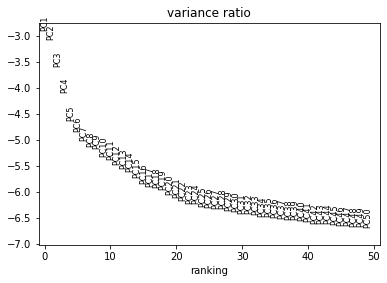

In [59]:
sc.pl.pca_variance_ratio(nm_ann_filtered, log=True, n_pcs=50)

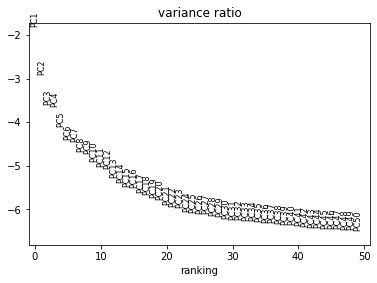

In [60]:
sc.pl.pca_variance_ratio(ncov_ann_filtered, log=True, n_pcs=50)

In [61]:
sc.pp.neighbors(ncov_ann_filtered, n_neighbors=10, n_pcs=40)

In [62]:
sc.pp.neighbors(nm_ann_filtered_raw, n_neighbors=10, n_pcs=40)

In [32]:
# overlap_genes = np.intersect1d(ncov_ann.var_names, schrepping_ann.var_names)

In [33]:
# ncov_ann_filtered = ncov_ann[:,overlap_genes]
# schrepping_ann_filtered = schrepping_ann[:,overlap_genes]

In [66]:
# ncov_ann_hvg.varm['PCs'] = ncov_ann1[:,used_genes].varm['PCs']

# Mapping

In [63]:
sc.tl.ingest(nm_ann_filtered_raw, ncov_ann_filtered, embedding_method='pca', obs='louvain_celltype')

In [65]:
np.unique(nm_ann_filtered_raw.obs['louvain_celltype'])

array(['B-AIM2', 'B-TCL1A', 'DC-CD1C', 'DC-LILRA4', 'MKI67 lymphocytes',
       'Mono-CD14-CCL3', 'Mono-CD14-CD16', 'Mono-CD14-HLA',
       'Mono-CD14-S100A8-CD163', 'Mono-CD14-S100A8-RETN', 'Mono−CD16',
       'NK-TYROBP-CD52', 'NK-TYROBP-FCER1G', 'NK-ZNF688-RNF213', 'Neu',
       'T-CD4-FOS', 'T-CD4-FOXP3', 'T-CD4-LEF1', 'T-CD4-LTB-S100A4',
       'T-CD8-GZMK', 'T-CD8-LEF1', 'T-CD8-SLC4A10', 'T-CD8-ZNF683',
       'T-gdT-TRDV2', 'mega', 'plasma', 'plasma-MKI67'], dtype=object)

In [74]:
nm_ann_filtered_raw.obs.to_csv('UK_COVID19_mapping_meta.csv')

In [66]:
nm_ann_filtered_raw.obs['louvain_celltype'].value_counts()

T-CD4-LEF1                87242
T-CD4-LTB-S100A4          75844
T-CD8-GZMK                65101
NK-TYROBP-CD52            62265
Mono-CD14-S100A8-RETN     57891
B-AIM2                    49915
Mono-CD14-HLA             48984
NK-TYROBP-FCER1G          36543
T-CD8-ZNF683              25112
T-CD4-FOS                 23928
B-TCL1A                   17042
Mono−CD16                 14965
mega                      14245
Mono-CD14-CCL3            10516
DC-CD1C                   10039
T-CD8-LEF1                 9515
Mono-CD14-S100A8-CD163     8145
plasma                     6683
DC-LILRA4                  4203
T-gdT-TRDV2                4038
T-CD4-FOXP3                4025
MKI67 lymphocytes          3588
plasma-MKI67               3106
T-CD8-SLC4A10              2869
NK-ZNF688-RNF213            930
Mono-CD14-CD16              615
Neu                          17
Mono-CD14-IFITM3              0
Name: louvain_celltype, dtype: int64

In [67]:
nm_ann_filtered_raw.obs['louvain_celltype'].value_counts().sum()

647366

In [68]:
nm_ann_filtered_raw.obs['full_clustering']

covid_index
AAACCTGAGAAACCTA-MH9179824       CD8.TE
AAACCTGAGAGTAATC-MH9179824     CD4.IL22
AAACCTGAGAGTGAGA-MH9179824    CD8.Naive
AAACCTGAGGAATCGC-MH9179824    CD4.Naive
AAACCTGAGTGTTGAA-MH9179824       CD8.EM
                                ...    
BGCV15_TTTGTCAAGGCGATAC-1        CD4.CM
BGCV15_TTTGTCACAAGCCATT-1       NK_16hi
BGCV15_TTTGTCACAGACACTT-1        CD8.EM
BGCV15_TTTGTCAGTTACGGAG-1     CD4.Naive
BGCV15_TTTGTCATCGAATGGG-1       NK_16hi
Name: full_clustering, Length: 647366, dtype: category
Categories (51, object): ['ASDC', 'B_exhausted', 'B_immature', 'B_malignant', ..., 'RBC', 'Treg', 'gdT', 'pDC']